In [1]:
import pandas as pd
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.model_selection import GridSearchCV
import graphviz 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_text
import graphviz  
from sklearn.tree import export_graphviz

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('ShootingSplits_HeatCheckTour.csv')
df = df.dropna(axis=1)
print(df.shape)
df.head(3)

(704, 47)


,Unnamed: 0,YEAR,TEAM NO,TEAM ID,TEAM,CONF,DUNKS FG%,DUNKS SHARE,DUNKS FG%D,DUNKS D SHARE,...,THREES D SHARE RANK,SEED,ROUND,POWER,PATH,WINS,POOL VALUE,POOL S-RANK,NCAA S-RANK,POWER-PATH
0,0,2024,1079,2,Akron,MAC,97.2,6.8,90.6,5.6,...,170,14,64,54.3,79.8,0,2.0,54,54,-25.5
1,1,2024,1078,3,Alabama,SEC,81.9,9.5,89.2,7.3,...,164,4,4,77.3,66.4,4,39.0,13,16,10.9
2,2,2024,1077,8,Arizona,P12,91.2,11.9,89.3,5.9,...,219,2,16,86.2,64.6,2,91.8,2,6,21.6


## Predicting WINS

In [3]:
df_train = df[df['YEAR'] != 2024]
df_test = df[df['YEAR'] == 2024]
X_train = df_train.drop(['Unnamed: 0','YEAR','TEAM NO','TEAM ID','TEAM','CONF','WINS','ROUND', 'POWER-PATH', 'POWER', 'PATH', 'POOL VALUE', 'POOL S-RANK', 'NCAA S-RANK'],axis=1)
X_test = df_test.drop(['Unnamed: 0','YEAR','TEAM NO','TEAM ID','TEAM','CONF','WINS','ROUND', 'POWER-PATH', 'POWER', 'PATH', 'POOL VALUE', 'POOL S-RANK', 'NCAA S-RANK'],axis=1)
stnd = StandardScaler().set_output(transform = 'pandas')
X_train = stnd.fit_transform(X_train)
X_test = stnd.transform(X_test)
y_train = df_train.WINS
y_test = df_test.WINS

In [4]:
lr = LogisticRegression(solver='lbfgs', max_iter=500)
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.5984375

In [5]:
coef_data = pd.DataFrame(index = X_train.columns)
intercepts = []
for i in range(7):
    coef_data['coefficients for WINS = ' + str(i)] = lr.coef_[i].reshape(-1, 1)
    intercepts.append(lr.intercept_[i])
coef_data.loc['intercepts'] = intercepts
coef_data

,coefficients for WINS = 0,coefficients for WINS = 1,coefficients for WINS = 2,coefficients for WINS = 3,coefficients for WINS = 4,coefficients for WINS = 5,coefficients for WINS = 6
DUNKS FG%,-0.214464,0.093258,0.456679,0.229742,-0.562587,0.229207,-0.231835
DUNKS SHARE,-0.039381,-0.286305,-0.191851,0.240196,0.598746,-0.517615,0.196211
DUNKS FG%D,-0.325662,-0.064233,-0.154960,0.469753,-0.069668,-0.086469,0.231240
DUNKS D SHARE,-0.338521,0.117708,0.626232,0.157600,0.158307,-0.157064,-0.564262
CLOSE TWOS FG%,-0.488010,-0.068242,0.373375,-0.125540,0.031214,0.361369,-0.084167
CLOSE TWOS SHARE,0.306750,-0.290822,0.374878,-0.164100,-0.462105,0.312862,-0.077463
CLOSE TWOS FG%D,0.031229,-0.096149,0.044254,0.173779,-0.611374,0.003923,0.454338
CLOSE TWOS D SHARE,-0.418471,-0.161367,-0.037575,0.044776,0.294562,0.042247,0.235828
FARTHER TWOS FG%,0.059713,-0.431465,0.296158,0.189993,-0.625747,0.268140,0.243208
FARTHER TWOS SHARE,-0.052428,0.049565,0.123033,-0.170161,0.382224,-0.358336,0.026103


In [6]:
coef_data_abs = coef_data.abs()
mean_abs_coef = coef_data_abs.mean(axis=1)
sorted_features = mean_abs_coef.sort_values(ascending=False)
sorted_features

intercepts                   1.923331
SEED                         0.600214
CLOSE TWOS D SHARE RANK      0.416034
DUNKS SHARE RANK             0.381569
THREES SHARE RANK            0.376524
THREES FG%D RANK             0.340366
FARTHER TWOS FG%D RANK       0.321637
DUNKS D SHARE                0.302813
FARTHER TWOS FG%             0.302060
FARTHER TWOS D SHARE RANK    0.297971
DUNKS SHARE                  0.295758
DUNKS FG%                    0.288253
CLOSE TWOS SHARE             0.284140
THREES D SHARE RANK          0.281554
FARTHER TWOS SHARE RANK      0.278380
FARTHER TWOS FG% RANK        0.260994
THREES FG%D                  0.259779
CLOSE TWOS FG% RANK          0.234970
CLOSE TWOS FG%               0.218845
CLOSE TWOS SHARE RANK        0.213501
THREES FG%                   0.211086
THREES SHARE                 0.205939
THREES FG% RANK              0.204426
CLOSE TWOS FG%D              0.202149
DUNKS FG%D                   0.200284
CLOSE TWOS D SHARE           0.176404
FARTHER TWOS

In [7]:
lr.score(X_test, y_test)

0.515625

In [8]:
df.WINS.value_counts().sort_values()

WINS
6     11
5     11
4     22
3     44
2     88
1    176
0    352
Name: count, dtype: int64

In [9]:
print('Baseline Error Rate =', 352/(352+176+88+44+22+11+11))

Baseline Error Rate = 0.5


In [10]:
yh_train = lr.predict(X_train)
num_errors = (y_train != yh_train).sum()
error_rate_train = num_errors / len(y_train)
print('Train Error Rate: ', error_rate_train)

Train Error Rate:  0.4015625


In [11]:
yh_test = lr.predict(X_test)
num_errors = (y_test != yh_test).sum()
error_rate_test = num_errors / len(y_test)
print('Test Error Rate: ', error_rate_test)

Test Error Rate:  0.484375


In [15]:
grid = {'max_depth':np.arange(1,10)}
dtree = DecisionTreeClassifier()
treeCV = GridSearchCV(dtree,param_grid=grid,return_train_score=True)
treeCV.fit(X_train,y_train)
print('best tree depth =',treeCV.best_params_, '  valid error rate =', (1 - treeCV.best_score_).round(3))

best tree depth = {'max_depth': 2}   valid error rate = 0.481


In [16]:
dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train,y_train)
dtree.score(X_train,y_train)

0.5390625

In [18]:
dtree.score(X_test,y_test)

0.5

In [26]:
yh_train = dtree.predict(X_train)
num_errors = (y_train != yh_train).sum()
error_rate_train = num_errors / len(y_train)
print('Train Error Rate: ', error_rate_train)
yh_test = dtree.predict(X_test)
num_errors = (y_test != yh_test).sum()
error_rate_test = num_errors / len(y_test)
print('Test Error Rate: ', error_rate_test)

Train Error Rate:  0.4609375
Test Error Rate:  0.5


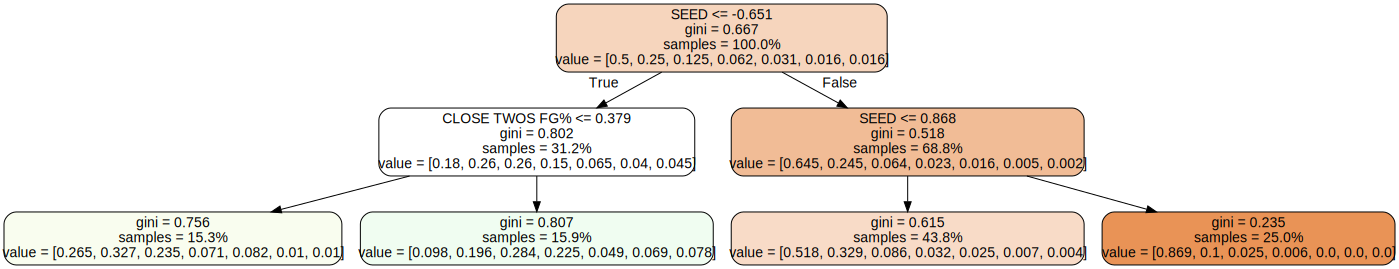

In [17]:
dot_data = export_graphviz(dtree,
                           out_file=None,
                           feature_names=X_train.columns,
                           proportion=True,
                           impurity=True,
                           filled=True,
                           rounded=True)
graph = graphviz.Source(dot_data)
graph

In [21]:
grid = {'n_neighbors':np.arange(1,10)}
knn = KNeighborsClassifier()
knnCV = GridSearchCV(knn,param_grid=grid,return_train_score=True)
knnCV.fit(X_train, y_train)
print('best # neighbors =',treeCV.best_params_, '  valid error rate =', (1 - treeCV.best_score_).round(3))

best # neighbors = {'max_depth': 2}   valid error rate = 0.481


In [24]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn.score(X_train,y_train)

0.70625

In [25]:
knn.score(X_test,y_test)

0.4375

In [27]:
yh_train = knn.predict(X_train)
num_errors = (y_train != yh_train).sum()
error_rate_train = num_errors / len(y_train)
print('Train Error Rate: ', error_rate_train)
yh_test = knn.predict(X_test)
num_errors = (y_test != yh_test).sum()
error_rate_test = num_errors / len(y_test)
print('Test Error Rate: ', error_rate_test)

Train Error Rate:  0.29375
Test Error Rate:  0.5625


In [ ]:
grid = {'max_depth':[1,2,3,10,20],'n_estimators':[100,2000]}
rfc = RandomForestClassifier()
rfcCV = GridSearchCV(rfc,param_grid=grid,n_jobs=-1)
rfcCV.fit(X_train,y_train)
print('Random Forest Regressor:')
print(' Optimal Parameters:',rfcCV.best_params_)
print(' Optimal Valid R2 =',rfcCV.best_score_)

In [ ]:
rfc = RandomForestClassifier(max_depth=20, n_estimators=2000)
rfc.fit(X_train,y_train)
rfc.score(X_train, y_train)

In [ ]:
rfc.score(X_test, y_test)

In [ ]:
yh_train = rfc.predict(X_train)
num_errors = (y_train != yh_train).sum()
error_rate_train = num_errors / len(y_train)
print('Train Error Rate: ', error_rate_train)
yh_test = rfc.predict(X_test)
num_errors = (y_test != yh_test).sum()
error_rate_test = num_errors / len(y_test)
print('Test Error Rate: ', error_rate_test)

In [ ]:
grid = {'learning_rate':[0.01,0.1,1],'n_estimators':[100,2000],'max_depth':[1,2,3,10,20]}
gbt = GradientBoostingClassifier()
gbtCV = GridSearchCV(gbt,param_grid=grid,n_jobs=-1)
gbtCV.fit(X_train, y_train)
print('Gradient Boosting Trees:')
print(' Optimal Parameters:',gbtCV.best_params_)
print(' Optimal Valid R2 =',gbtCV.best_score_)

In [ ]:
gbt = GradientBoostingClassifier(max_depth=10, n_estimators=2000, learning_rate=0.01)
gbt.fit(X_train,y_train)
gbt.score(X_train, y_train)

In [ ]:
gbt.score(X_test, y_test)

In [ ]:
yh_train = gbt.predict(X_train)
num_errors = (y_train != yh_train).sum()
error_rate_train = num_errors / len(y_train)
print('Train Error Rate: ', error_rate_train)
yh_test = gbt.predict(X_test)
num_errors = (y_test != yh_test).sum()
error_rate_test = num_errors / len(y_test)
print('Test Error Rate: ', error_rate_test)